In [34]:
from fastai import *
from fastai.vision.all import *
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [5]:
!unzip "/content/drive/MyDrive/archive.zip"

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [21]:
a = "/content/dataset/seg_train/seg_train"
path = Path(a)
path.ls()

(#6) [Path('/content/dataset/seg_train/seg_train/forest'),Path('/content/dataset/seg_train/seg_train/sea'),Path('/content/dataset/seg_train/seg_train/street'),Path('/content/dataset/seg_train/seg_train/glacier'),Path('/content/dataset/seg_train/seg_train/mountain'),Path('/content/dataset/seg_train/seg_train/buildings')]

**Data Loading for training**

In [25]:
np.random.seed(40)
item_tfms = [Resize(224)]
data = ImageDataLoaders.from_folder(path, train = '.', valid_pct=0.2,
                                   size=224,
                                  item_tfms=item_tfms)


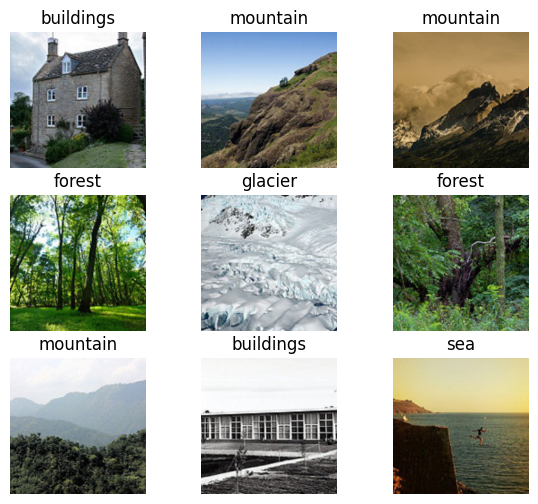

In [26]:
data.show_batch(figsize=(7,6))

In [27]:
data.c # for number of classes

6

In [28]:
len(data.train_ds) #length of train data

11228

In [29]:
len(data.valid_ds) #length of train data

2806

In [30]:
print(data.vocab) #classes of data

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


**Creation of model**

In [31]:
learn = cnn_learner(data, models.resnet18, path=Path("."))


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd

AttributeError: ignored

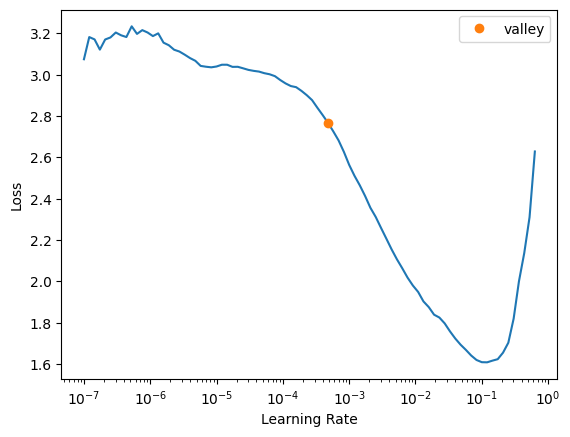

In [35]:
learn.lr_find()
learn.recorder.plot_model(suggestions=True)

In [36]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(50,slice(lr1,lr2))

In [38]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))

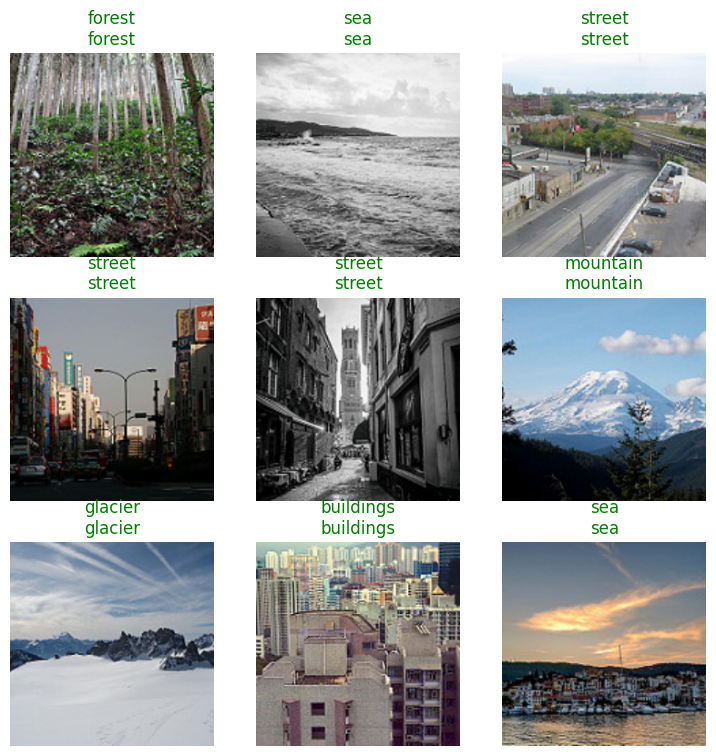

In [40]:
learn.show_results()

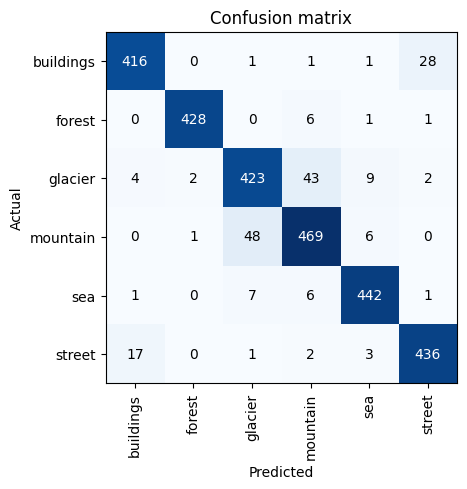

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

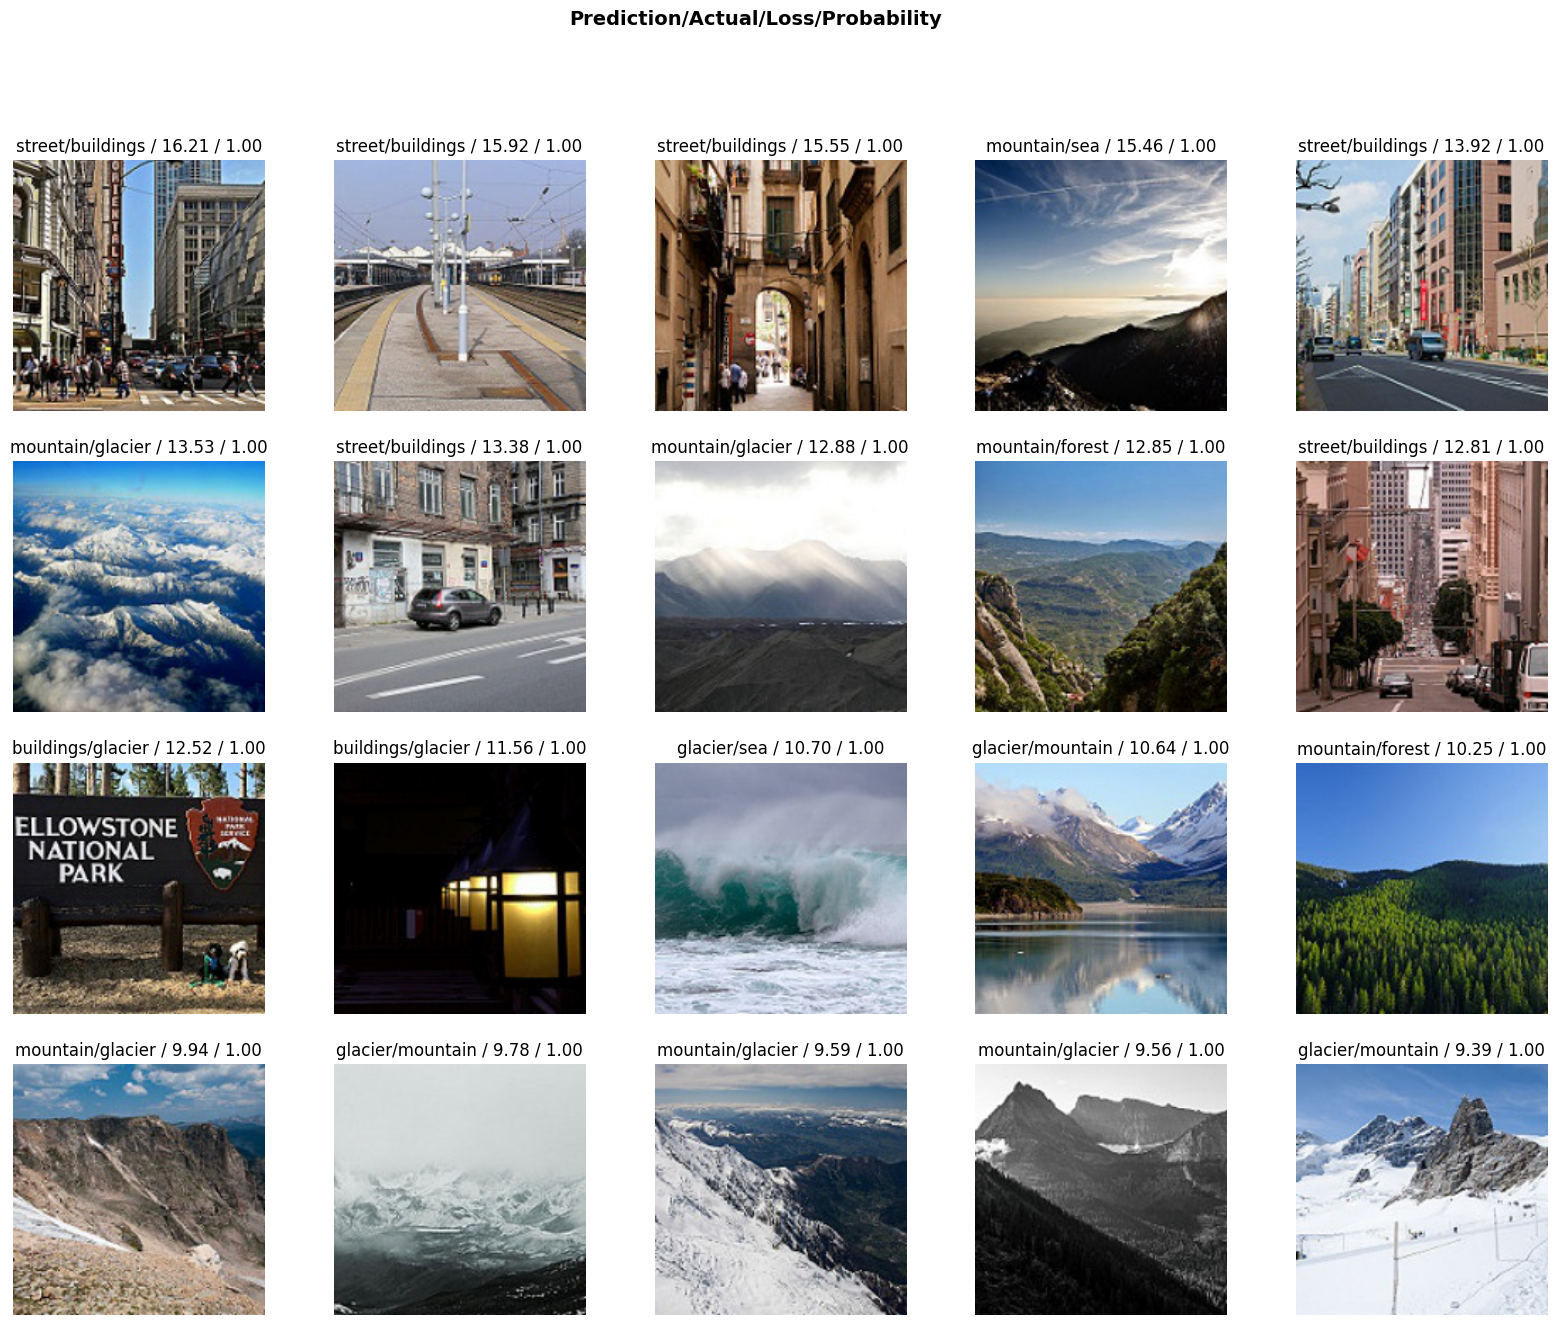

In [42]:
# Comparing the predicted and actual output
interp.plot_top_losses(20,figsize = (20,15))

**prediction using the trained model**

In [43]:
im = Image.open('/content/dataset/seg_test/seg_test/forest/20089.jpg')
im_t = cast(array(im), TensorImage)

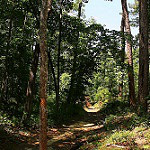

In [44]:
im

In [45]:
im_t #showing image tensor

TensorImage([[[ 10,  21,   5],
              [ 74,  81,  63],
              [ 14,  19,   0],
              ...,
              [  5,   7,   0],
              [ 52,  55,  44],
              [  2,   8,   0]],

             [[ 76,  88,  68],
              [ 66,  74,  53],
              [ 12,  17,   0],
              ...,
              [ 31,  32,  24],
              [ 43,  46,  39],
              [ 31,  36,  29]],

             [[ 17,  29,   5],
              [ 17,  25,   4],
              [ 29,  33,  18],
              ...,
              [ 75,  76,  70],
              [ 70,  73,  66],
              [ 20,  25,  19]],

             ...,

             [[ 17,  14,   5],
              [ 26,  24,  12],
              [ 22,  20,   8],
              ...,
              [246, 244, 141],
              [153, 147,  51],
              [159, 147,  49]],

             [[ 15,  13,   1],
              [ 11,   9,   0],
              [ 17,  15,   3],
              ...,
              [191, 178, 110],
          

In [46]:
learn.export(Path("/content/model/export.pkl"))
learn.model_dir = "/content/model"
learn.save("stage-1")

Path('/content/model/stage-1.pth')

Predicted label: buildings, probability: 0.9999


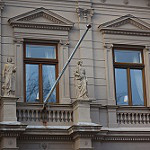

In [47]:
from PIL import Image
img = Image.open('/content/dataset/seg_test/seg_test/buildings/20096.jpg')

# Resize the image to 224x224
img_resized = img.resize((224, 224))
pred, pred_idx, probs = learn.predict(img_resized)
im_t = cast(array(img_resized), TensorImage)
# Print the predicted label and probability
print(f"Predicted label: {pred}, probability: {probs[pred_idx]:.4f}")
img